[![Abrir no Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/labren/sonda-curadoria/blob/main/01_Analise_Exploratoria_Solarimetricos.ipynb)

# Análise Exploratória de Dados Solarimétricos
Este notebook realiza uma análise exploratória dos dados solarimétricos da rede SONDA.

## Importação das Bibliotecas
- **duckdb**: Banco de dados relacional que permite consultas SQL em arquivos locais
- **matplotlib.pyplot**: Biblioteca para criação de gráficos
- **seaborn**: Biblioteca para visualização de dados estatísticos

In [1]:
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns

## Configuração Inicial
Definindo o caminho do arquivo parquet contendo os dados solarimétricos e o nome da tabela.

In [6]:
# Instalar gdown para descargar el archivo de Google Drive
!python -m pip install -q -U gdown

import gdown

url = 'https://drive.google.com/uc?id=1JJ084_fEB3PJoiKrrFCEfxoyyz7u6mU9'
gdown.download(url, 'Solarimetrica.parquet', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1JJ084_fEB3PJoiKrrFCEfxoyyz7u6mU9
From (redirected): https://drive.google.com/uc?id=1JJ084_fEB3PJoiKrrFCEfxoyyz7u6mU9&confirm=t&uuid=55dae497-3171-43b7-80c0-3f1399410878
To: /home/helvecioneto/sonda-curadoria/Solarimetrica.parquet
100%|██████████| 6.15G/6.15G [08:55<00:00, 11.5MB/s]


'Solarimetrica.parquet'

In [2]:
# Configurações para o nome do arquivo e da tabela
ARQUIVO_SOLARIMETRO = './Solarimetrica.parquet'
NOME_DA_TABELA = 'solarimetrica'

## Conexão com o Banco de Dados
Criando uma conexão em memória com o DuckDB.

In [3]:
con = duckdb.connect(database=':memory:')

Importando os dados do arquivo Parquet para uma tabela no DuckDB.

In [4]:
# Cria as tabelas no banco de dados DuckDB a partir dos arquivos Parquet
con.execute(f"""CREATE TABLE IF NOT EXISTS {NOME_DA_TABELA} AS \
            SELECT * FROM read_parquet('{ARQUIVO_SOLARIMETRO}')""")

# Visualização Inicial dos Dados
Exibindo as primeiras 5 linhas da tabela para verificar sua estrutura.

In [5]:
# Exibe as primeiras linhas da tabela
con.execute(f"SELECT * FROM {NOME_DA_TABELA} LIMIT 5").fetch_df()

,acronym,timestamp,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,dir_min,lw_avg,lw_std,lw_max,lw_min,temp_glo,temp_dir,temp_dif,temp_dome,temp_case
0,SLZ,2013-07-01 18:49:00,2013,182,1129.0,134.400,0.441,135.100,133.800,120.000,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,SLZ,2013-07-02 01:35:00,2013,183,95.0,-1.822,0.191,-1.305,-1.958,-1.292,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,SLZ,2013-07-02 02:21:00,2013,183,141.0,-1.316,0.059,-1.305,-1.632,-1.292,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,SLZ,2013-07-02 15:12:00,2013,183,912.0,949.000,1.143,950.000,946.000,171.800,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,SLZ,2013-07-02 18:54:00,2013,183,1134.0,3.138,0.207,3.264,2.611,2.876,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [6]:
# Faz uma consulta para obter dados da estação BRB para o período de 2018-12-01 a 2019-12-31
query = f"""
SELECT * FROM {NOME_DA_TABELA}
WHERE acronym = 'BRB' AND timestamp >= '2010-01-01' AND timestamp <= '2025-12-31'
"""
# Executa a consulta e armazena o resultado em um DataFrame
estacao_df = con.execute(query).fetch_df()
estacao_df

,acronym,timestamp,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,dir_min,lw_avg,lw_std,lw_max,lw_min,temp_glo,temp_dir,temp_dif,temp_dome,temp_case
0,BRB,2014-05-06 21:58:00,2014,126,1318.0,-3.290,0.081,-3.155,-3.455,-1.955,...,-1.415,342.5,0.216,342.9,341.9,20.29,19.63,20.01,21.19,21.60
1,BRB,2014-05-06 22:09:00,2014,126,1329.0,-3.155,0.000,-3.155,-3.155,-2.168,...,-0.202,345.7,0.247,346.4,345.3,20.60,19.63,20.30,21.18,21.53
2,BRB,2014-05-06 22:55:00,2014,126,1375.0,-3.247,0.126,-3.155,-3.455,-1.585,...,-1.416,342.9,0.305,343.6,342.1,19.75,19.17,19.49,20.87,21.25
3,BRB,2014-05-07 01:06:00,2014,127,66.0,-2.857,0.019,-2.855,-3.005,-1.624,...,-0.404,344.8,0.349,345.7,344.3,20.07,19.33,19.93,20.73,21.11
4,BRB,2014-05-07 11:41:00,2014,127,701.0,492.900,1.879,494.800,488.900,68.720,...,819.000,330.9,0.476,331.8,330.0,22.45,23.41,22.42,25.19,25.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3156475,BRB,2018-03-15 15:00:00,2018,74,900.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00
3156476,BRB,2018-03-15 18:30:00,2018,74,1110.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00
3156477,BRB,2018-03-15 18:34:00,2018,74,1114.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00
3156478,BRB,2018-03-15 19:33:00,2018,74,1173.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00


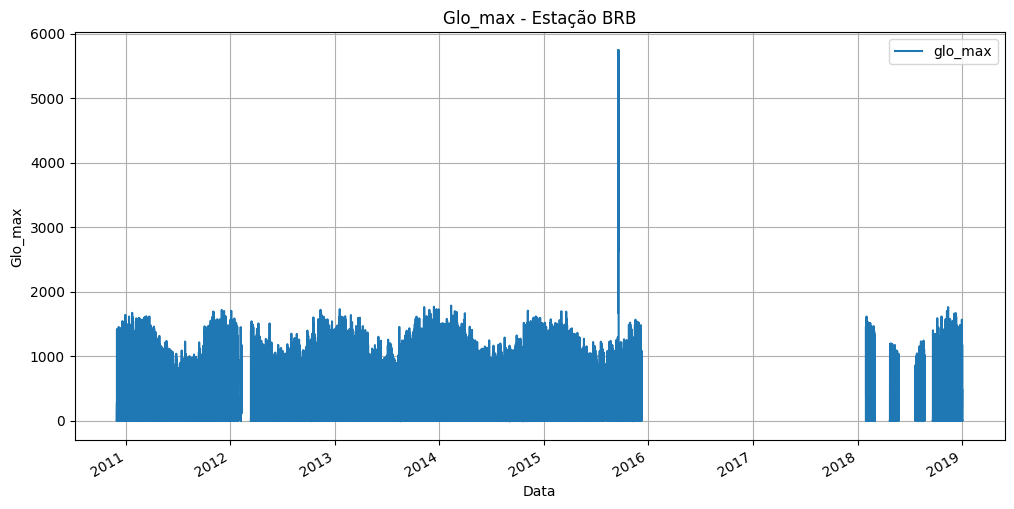

In [7]:
# Seta coluna timestamp como índice e plota variável glo_max
plot_estacao = estacao_df.set_index('timestamp').sort_index()
plot_estacao[['glo_max']].plot(title='Glo_max - Estação BRB', figsize=(12, 6))
plt.xlabel('Data')
plt.ylabel('Glo_max')
plt.grid()
plt.show()

In [8]:
import warnings
warnings.filterwarnings("ignore")

def verifica_temporal(base):
    # Faz um agrupamento por acronym e timestamp para verificar se os dados são temporais, fazendo a contagem de registros por dia
    query = f"""
    SELECT acronym, DATE_TRUNC('year', timestamp) AS data, COUNT(*) AS registros
    FROM {base}
    GROUP BY acronym, data
    ORDER BY data
    """
    return con.execute(query).fetch_df()


def plot_tempora(df, titulo):
    df["year"] = df["data"].dt.year
    df["month"] = df["data"].dt.month
    df = df.dropna(subset=["year"])
    df["year"] = df["year"].astype(int)
    # Reagrupando os dados para evitar duplicatas ao pivotar
    df_grouped = df.groupby(["acronym", "year"])["registros"].sum().reset_index()
    # Criando a matriz pivot corrigida
    heatmap_data = df_grouped.pivot(index="acronym", columns="year", values="registros")
    # Criando a figura
    plt.figure(figsize=(8, max(4, len(heatmap_data) * 0.2)))  # Ajusta dinamicamente o tamanho
    sns.heatmap(heatmap_data, cmap="coolwarm_r", linewidths=0.5, linecolor="gray", 
                cbar_kws={'label': 'Número de Registros'}, annot=False)
    # Ajustando o gráfico
    plt.title(titulo)
    plt.xlabel("Ano")
    plt.ylabel("Estação")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

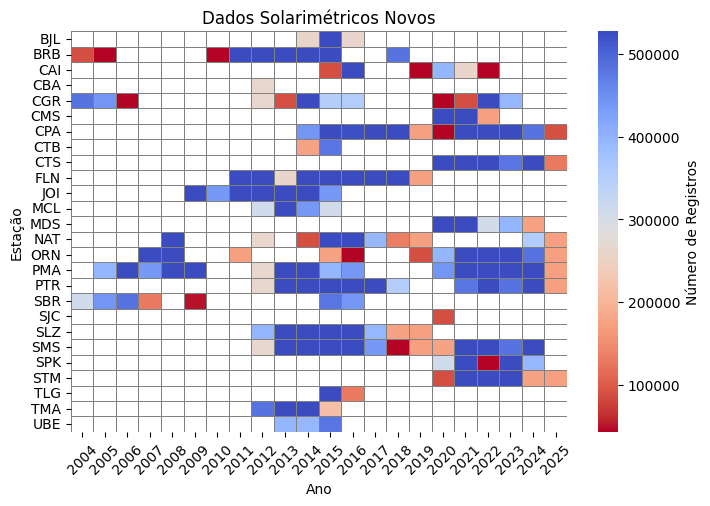

In [9]:
# Plotando os dados temporais de dados disponíveis
temporal_solar = verifica_temporal(NOME_DA_TABELA)
plot_tempora(temporal_solar, 'Dados Solarimétricos Novos')

## Análise dos dados em quarentena

In [13]:
# Download quarentena.csv from Google Drive
url = 'https://drive.google.com/uc?id=1P4h_uGZ8CtZJmkLjemjuYTfkIr5vX3mJ'
gdown.download(url, 'quarentena.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1P4h_uGZ8CtZJmkLjemjuYTfkIr5vX3mJ
To: /home/helvecioneto/sonda-curadoria/quarentena.csv
100%|██████████| 683k/683k [00:00<00:00, 7.34MB/s]


'quarentena.csv'

In [10]:
import pandas as pd

# Lê o arquivo CSV quarentena.csv
quarentena_df = pd.read_csv('quarentena.csv')
quarentena_df

,qid,estacao,tipo,status,code,data_detecao,data_tratamento,problema,path
0,1,SPK,SD,Ruim,3,2025-07-28 15:17:09,NaN,"datas diferentes encontradas, esperado: 2023-1...",output/sonda-quarentena/SPK/Solarimetricos/SPK...
1,2,SPK,SD,Ruim,3,2025-07-28 15:17:09,NaN,"datas diferentes encontradas, esperado: 2023-1...",output/sonda-quarentena/SPK/Solarimetricos/SPK...
2,3,SPK,SD,Ruim,3,2025-07-28 15:17:09,NaN,"datas diferentes encontradas, esperado: 2024-0...",output/sonda-quarentena/SPK/Solarimetricos/SPK...
3,4,SPK,SD,Ruim,3,2025-07-28 15:17:09,NaN,"datas diferentes encontradas, esperado: 2024-0...",output/sonda-quarentena/SPK/Solarimetricos/SPK...
4,5,SPK,SD,Ruim,3,2025-07-28 15:17:09,NaN,"datas diferentes encontradas, esperado: 2024-0...",output/sonda-quarentena/SPK/Solarimetricos/SPK...
...,...,...,...,...,...,...,...,...,...
383,384,CAI,SD,Ruim,3,2025-07-28 15:31:04,NaN,"datas diferentes encontradas, esperado: 2020-0...",output/sonda-quarentena/CAI/Solarimetricos/CAI...
384,385,CAI,SD,Ruim,3,2025-07-28 15:31:04,NaN,"datas diferentes encontradas, esperado: 2020-0...",output/sonda-quarentena/CAI/Solarimetricos/CAI...
385,386,CAI,SD,Ruim,3,2025-07-28 15:31:04,NaN,"datas diferentes encontradas, esperado: 2020-0...",output/sonda-quarentena/CAI/Solarimetricos/CAI...
386,387,CAI,SD,Ruim,3,2025-07-28 15:31:04,NaN,"datas diferentes encontradas, esperado: 2020-0...",output/sonda-quarentena/CAI/Solarimetricos/CAI...


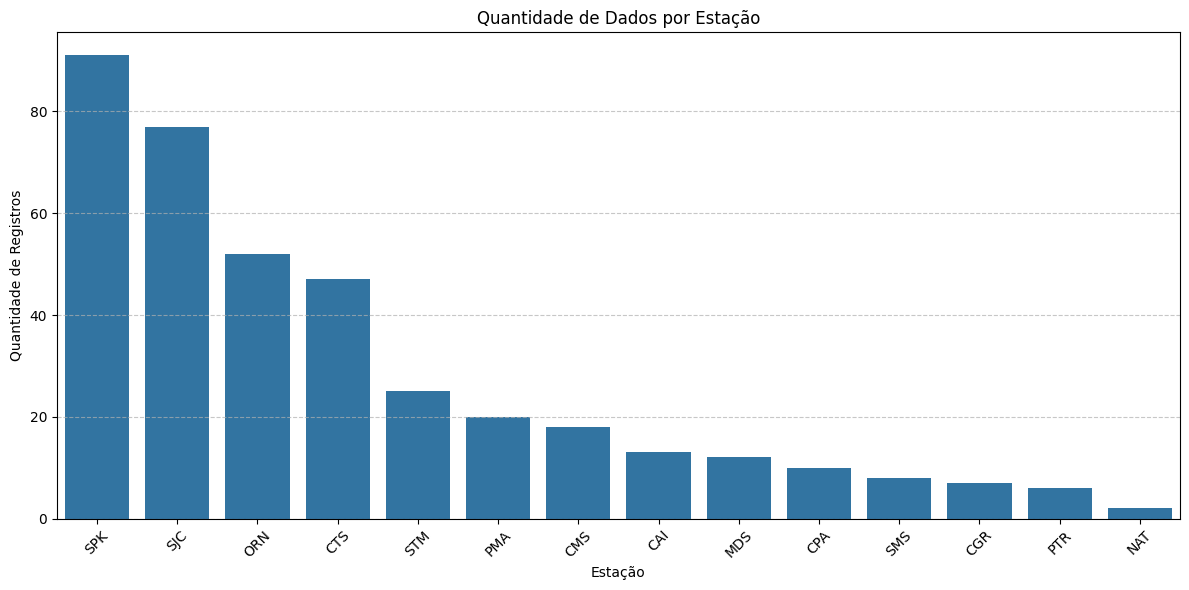

In [11]:
# Agrupando os dados por estação e contando registros
estacao_counts = quarentena_df.groupby('estacao').size().reset_index(name='contagem')

# Ordenando por contagem para melhor visualização
estacao_counts = estacao_counts.sort_values('contagem', ascending=False)

# Criando gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='estacao', y='contagem', data=estacao_counts)

# Adicionando título e rótulos
plt.title('Quantidade de Dados por Estação')
plt.xlabel('Estação')
plt.ylabel('Quantidade de Registros')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
# Exibindo a tabela com as contagens
print("Número de registros por estação:")
print(estacao_counts)

Número de registros por estação:
   estacao  contagem
12     SPK        91
10     SJC        77
7      ORN        52
4      CTS        47
13     STM        25
8      PMA        20
2      CMS        18
0      CAI        13
5      MDS        12
3      CPA        10
11     SMS         8
1      CGR         7
9      PTR         6
6      NAT         2


In [20]:
# Faz uma contagem dos problemas encontrados usando string matching
from collections import Counter

# Definindo os tipos de problemas a serem contados
tipos = ['datas diferentes encontradas', 'não é possível realizar o teste temporal','mais de 50% dos valores de timestamp são nulos', 'progressão de timestamps não é monotônica crescente', 'intervalo total de timestamps é menor que 12 horas']

def contar_problemas(df, tipos):
    contagem = Counter()
    
    # Para cada tipo de problema, procura por strings que contenham essa substring
    for tipo in tipos:
        # Conta quantas linhas contêm este tipo de problema
        count = df['problema'].str.contains(tipo, na=False).sum()
        contagem[tipo] = count
    
    return contagem

# Contando os problemas encontrados
problemas_contados = contar_problemas(quarentena_df, tipos)

# Exibindo os resultados
print("Contagem de problemas encontrados:")
for problema, contagem in problemas_contados.items():
    print(f"{problema}: {contagem}")

Contagem de problemas encontrados:
datas diferentes encontradas: 309
não é possível realizar o teste temporal: 0
mais de 50% dos valores de timestamp são nulos: 0
progressão de timestamps não é monotônica crescente: 43
intervalo total de timestamps é menor que 12 horas: 36


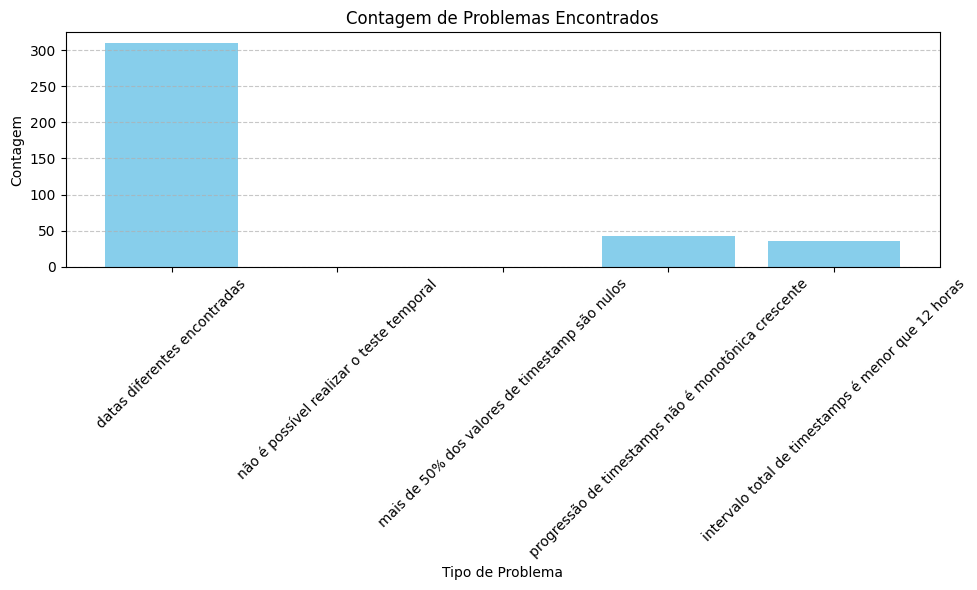

In [21]:
# Crie um plot de barras para visualizar a contagem de problemas
plt.figure(figsize=(10, 6))
plt.bar(problemas_contados.keys(), problemas_contados.values(), color='skyblue')
plt.title('Contagem de Problemas Encontrados')
plt.xlabel('Tipo de Problema')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()